<a href="https://colab.research.google.com/github/jordanburdett/decisionTrees/blob/master/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree

---

First lets learn how to use them with an off the shelf implementation and then we can build one! Yippee!!

In [0]:
import pandas as pd
import numpy as np 
from sklearn import tree
from collections import Counter
import graphviz 


names = ["price", "maint", "doors", "numPeople", "cargoSpace", "safteyMeasure", "acceptable"]
carData = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None, skipinitialspace=True, names=names, na_values=["?"])

names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model", "origin", "carname"]
carMPG = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, names=names, na_values=["?"], sep="\s+")

names = ["L1", "L2", "L3", "L4", "Targets"]
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=names, na_values=["?"])

In [0]:
iris

,L1,L2,L3,L4,Targets
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
print("hello")

hello


In [0]:
# Horse power has some NaNs... Im going to take the average and set it for those values that are NaN

def replaceNaNAverage(data):
  testColumn = data.isna().any()

  # Loop through all isNa columns
  for columnName, hasNaN in testColumn.items():
      if hasNaN:
          counts = Counter(data[columnName])
          data[columnName] = data[columnName].fillna(counts.most_common(1)[0][0])
  return data

carMPG = replaceNaNAverage(carMPG)

carMPG.isna().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model           False
origin          False
carname         False
dtype: bool

In [0]:
iris.isna().any()

L1         False
L2         False
L3         False
L4         False
Targets    False
dtype: bool

All NaN's have been dealt with! Now on to some decision trees!

In [0]:
iris.head()


,L1,L2,L3,L4,Targets
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
features = iris[['L1', 'L2', 'L3', 'L4']].to_numpy()
targets = iris['Targets'].to_numpy()

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)

In [0]:
irisTree = tree.DecisionTreeClassifier(max_depth=4)
irisTree.fit(train_data, train_targets)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(125.55000000000001, 195.696, 'X[3] <= 0.7\ngini = 0.665\nsamples = 105\nvalue = [34, 33, 38]'), Text(83.7, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'), Text(167.4, 152.208, 'X[2] <= 4.75\ngini = 0.498\nsamples = 71\nvalue = [0, 33, 38]'), Text(83.7, 108.72, 'X[3] <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'), Text(41.85, 65.232, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'), Text(125.55000000000001, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(251.10000000000002, 108.72, 'X[2] <= 5.05\ngini = 0.097\nsamples = 39\nvalue = [0, 2, 37]'), Text(209.25, 65.232, 'X[1] <= 3.1\ngini = 0.346\nsamples = 9\nvalue = [0, 2, 7]'), Text(167.4, 21.744, 'gini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'), Text(251.10000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(292.95, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]


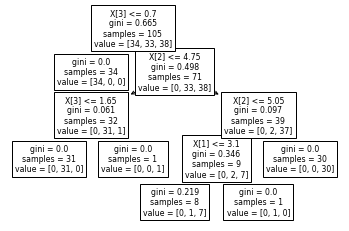

In [0]:
print(tree.plot_tree(irisTree))

In [0]:
predictions = irisTree.predict(test_data)

In [0]:
numCorrect = 0

for i in range(len(predictions)):
  if predictions[i] == test_targets[i]:
    numCorrect += 1

accuracy = (numCorrect / len(predictions)) * 100

print(accuracy)

91.11111111111111


Looks like I got the same score as my Knn Classifier! So that good! 97.777 Percent is pretty darn good! Haha I reRan everything and got 100 Percent Accuracy! Ohhh yaaa. Take that Knn classifier! Also found a cooler way to display the tree making it way easier to visualize the decision tree!

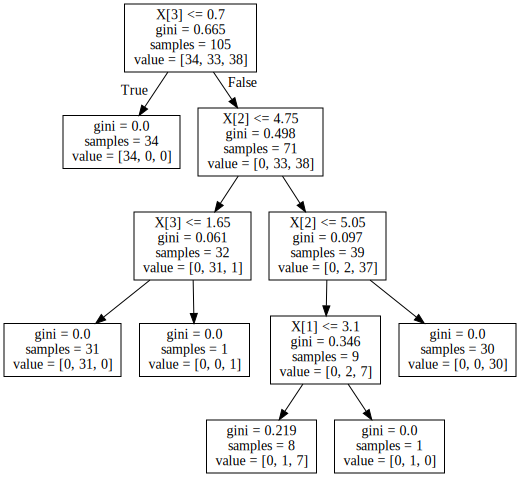

In [0]:
dot_data = tree.export_graphviz(irisTree)  
graph = graphviz.Source(dot_data)  
graph 

Cool! Moving on to car MPG!

In [0]:
carMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [0]:
features = carMPG[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin']]
targets = carMPG['mpg']

train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)


In [0]:
MPGTree = tree.DecisionTreeRegressor()
MPGTree.fit(train_data, train_targets)

dot_data = tree.export_graphviz(MPGTree, feature_names=features.columns, class_names=["MPG"])  
graph = graphviz.Source(dot_data)  
graph.save("bigTreeCarData.jpg")

'bigTreeCarData.jpg'

In [0]:
## Wow... Thats massive! Sweet! I wonder if it works? Spoiler it didn't This was overfitted way way way bad.

predictions = MPGTree.predict(test_data)

# New Section

In [0]:
import sklearn.metrics as sk

# variance score
print("Variance Score")
print(sk.explained_variance_score(test_targets, predictions))

# max error
from sklearn.metrics import max_error
print("max error")
print(max_error(test_targets, predictions))

# mean absolute error
from sklearn.metrics import mean_absolute_error
print("mean absolute error")
print(mean_absolute_error(test_targets, predictions))

# Mean squared error
from sklearn.metrics import mean_squared_error
print("mean squared error")
print(mean_squared_error(test_targets, predictions))


# Mean squared log error
print ("mean squared log error")
print(sk.mean_squared_log_error(test_targets, predictions))

# r2 score
print ("r2 score")
print (sk.r2_score(test_targets, predictions))

Variance Score
0.8460864519748723
max error
18.6
mean absolute error
2.1333333333333333
mean squared error
9.193000000000001
mean squared log error
0.016607427904672293
r2 score
0.8458647137871027


after during a tone of testing and following a couple of articles on how to get the best results from the decision tree this is about the best I could get. putting a min sample leaf count of around 4 and a max depth of around 8 was the sweet spot. Any more than that and the dataset started to over fit and would end up getting worse results.

---

Next data set will be testing if a car is acceptable or not. This is a classification test again. The difference here is that there is a mix between numeric data classification data. The only thing I will need to do extra is change the data to be all numeric. I will also be testing the differences between normalizing the data and not normalizing the data.

In [0]:
## Couple of functions I will need made from other assignments
def normalizeData(data):
  return (data - data.mean()) / (data.max() - data.min())

def makeCatCodes(data):
  for label,dtype in data.dtypes.items():
    if dtype == object:
        print(label)
        # set the dataframe to be a category
        data[label] = data[label].astype('category')

        # create new row using cat codes
        data["{}_cat".format(label)] = data[label].cat.codes
        
  return data

In [0]:
carData = makeCatCodes(carData)
carData.head()

price
maint
doors
numPeople
cargoSpace
safteyMeasure
acceptable


,price,maint,doors,numPeople,cargoSpace,safteyMeasure,acceptable,price_cat,maint_cat,doors_cat,numPeople_cat,cargoSpace_cat,safteyMeasure_cat,acceptable_cat
0,vhigh,vhigh,2,2,small,low,unacc,3,3,0,0,2,1,2
1,vhigh,vhigh,2,2,small,med,unacc,3,3,0,0,2,2,2
2,vhigh,vhigh,2,2,small,high,unacc,3,3,0,0,2,0,2
3,vhigh,vhigh,2,2,med,low,unacc,3,3,0,0,1,1,2
4,vhigh,vhigh,2,2,med,med,unacc,3,3,0,0,1,2,2


In [0]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

## Unnormalized data
features = carData[['price_cat', 'maint_cat', 'doors_cat', 'numPeople_cat', 'cargoSpace_cat', 'safteyMeasure_cat']]
targets = carData['acceptable']

train_data, test_data, train_targets, test_targets = train_test_split(features, targets, test_size=.3)

## normalized Data
norm_train_data, norm_test_data, norm_train_targets, norm_test_targets = train_test_split(preprocessing.normalize(features, norm='l1'), targets, test_size=.3)

test_targets = test_targets.to_numpy()
norm_test_targets = norm_test_targets.to_numpy()


In [0]:
## Unnormalized Data
carTree = tree.DecisionTreeClassifier()
carTree.fit(train_data, train_targets)
predictions = carTree.predict(test_data)



## Normalized Data
carTreeNorm = RandomForestClassifier(n_estimators=100)
carTreeNorm.fit(train_data, train_targets)
normPredictions = carTreeNorm.predict(test_data)



In [0]:

print("unNormalized accuracy: " + str(carTree.score(test_data, test_targets) * 100))
print("Random forest: " + str(carTreeNorm.score(test_data, test_targets) * 100))



unNormalized accuracy: 97.6878612716763
Random forest: 96.72447013487476
